# <center>Tradus exercise</center>

### <center>Author: Adriana Vega</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt



## Problem statement

The Tradus Challenge consists in creating a Machine Learning model able to accurately predict apartment price given a set of attributes defining the property. 

In order to accomplish the task, you will build a model using whatever programming language you are comfortable with (preferably Python). Notice that your task will be assessed taking into consideration not only the final accuracy of the model, but also decisions made along the way and programming style.

The dataset to train the model can be found in the attached CSV file (tradus_challenge_data.csv)

To succeed in this challenge, you will be given 5 working days to submit your deliverable, which is going to be the code to train and/or validate the model. Please, be explicit with the decisions you make.

Good luck and happy coding!

### Plan

1. Data preparation

    - Explore and clean the data
    
    

2. Exploratory data analysis
     
    - Analyse related features
    
    - Missing values and outliers


3. Create a predictive algorithm

    - Prepare data for the preictive model
    
    - Predictive algorithms
    

4. Evaluating the model

## 1. Data preparation

In [2]:
# Import the data frame
df_price = pd.read_csv('/Users/anunez/Documents/Curses/Test/TradusChallenge/tradus_challenge_data.csv')

I first use the info and describe function to make an explooration of the data set. 

In [3]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67107 entries, 0 to 67106
Data columns (total 6 columns):
neighbourhood    67107 non-null object
price            67107 non-null float64
size             67107 non-null float64
bedrooms         67107 non-null int64
bathrooms        63657 non-null float64
building         61068 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
df_price.describe()

price          size      bedrooms     bathrooms
count  6.710700e+04  6.710700e+04  67107.000000  63657.000000
mean   2.199118e+05  1.621593e+03      1.654969      2.403066
std    5.882342e+06  9.049481e+03      1.008304      1.077319
min    2.200000e+04 -7.550000e+02      0.000000      1.000000
25%    9.900000e+04  8.400000e+02      1.000000      2.000000
50%    1.300000e+05  1.200000e+03      2.000000      2.000000
75%    1.650000e+05  1.637000e+03      2.000000      3.000000
max    5.653530e+08  1.170000e+06     12.000000     12.000000

In the first exploration df_price.info() of the price data frame, the two columns with nan values are bathrooms and building.

With the describe function, we can see the percentile’s and other key statistics of the numerical values.

- price: maximun price is 565'353.000 (quite expensive house) and the minimun is 22.000. We will take a closer look to the distribution of this variable.

- size: maximum size is 1'170.000 and the minimum is less than 0, which can't be possible. 

- bedrooms: the dataset has a house where the house has 12 bedrooms, seems to be a massive house and would be interesting to know more about it as we progress.

- bathrooms: there is a house with 12 bathrooms, as well a quite massive house.


## 2. Exploratory data analysis

I will explore the different features of the data set.  

   - Distribution of continuous variables

   - Relationship between price and the other features
   
   - Correlation between continuos variables

Impute the missing values and outliers   

### Distribution and outliers of the price and size features

In [5]:
def distribution_feature(df, feature_col, quantile_value, ax):
    """
    Plot the distribution of a feature of the selected quntile_value percentile 
    
    :param df: pandas dataframe including the feature to plot 
    :param feature_col: column name of the variable to be plotted
    :param quantile_value: percentile of the feature to be plotted
    :param ax: figure axis 
    
    :return: distribution of the feature_col of the quntile_value percentile 
    
    """
    
    ax.hist(df[df[feature_col] < df[feature_col].quantile(quantile_value)] [feature_col]
            , bins=20
            , alpha = 0.4
           )
    ax.set_title(f"Distribution {feature_col} of {quantile_value} percentile", fontsize=16)
    ax.set_ylabel("Denisty", fontsize=14)
    ax.set_xlabel(f"{feature_col}", fontsize=14)
    ax.legend()
    
    plt.show()

In [6]:
def boxplot_feature(df, feature_col, axis):
    
    """
    Plot the boxplot of a feature 
    
    :param df: pandas dataframe including the feature to be plotted
    :param feature_col: column name of the variable to be plotted
    :param axis: figure axis 
    
    :return: boxplot for a feature 
    
    """
    b = sns.boxplot(x=feature_col
                , orient="v"
                , ax=axis
                , data=df
                , palette="Set2")
    b.set_title(f"Boxplot {feature_col}", fontsize=16)
    

In [7]:
def plot_grid(df, feature_col, quantile_value):
    
    """
    Shows 2 figures including the distribution and boxplot for each column specified in feature_col
    Additionally, it prints the descriptive statistics (mean, median and standar deviation) for each feature
    
    :param df: pandas dataframe including the feature 
    :param feature_col: column name of the variable to be plotted.
    :quantile_value: percentile of the feature to be plotted
    
    :return: distribution, boxplot and descriptive statistics for each feature in feature_col
    
    """
    
    fig, [ax,ax1] = plt.subplots(ncols=2,nrows=1,figsize=(19,5))
    
    boxplot_feature(df=df, feature_col=feature_col, axis=ax1)
    distribution_feature(df=df ,feature_col=feature_col,  quantile_value=quantile_value, ax=ax)
    
    plt.show()

    mean = df[feature_col].mean()
    median = df[feature_col].median()
    std = df[feature_col].std()
    print(f"Mean: {round(mean,3)}\nMedian: {round(median,3)}\nStd.: {round(std,3)}")
    print(20*"=")
    

In [8]:
# Define list of features to plot
plot_features = ['price', 'size']

Mean: 219911.781
Median: 130000.0
Std.: 5882341.621


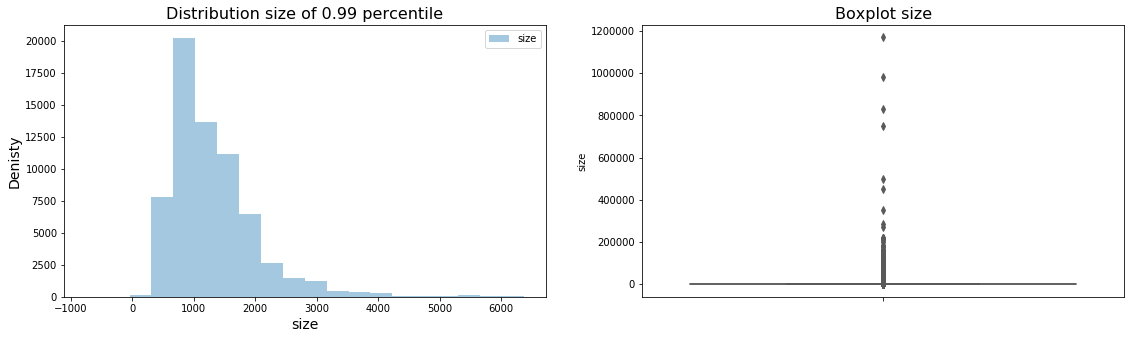

Mean: 1621.593
Median: 1200.0
Std.: 9049.481


In [9]:
for feature in plot_features:
    plot_grid(df=df_price, feature_col=feature, quantile_value=.99)

#### Comments on the previous graphs (distribution and boxplot):
- #### Price:

The boxplot shows the presence of extreme values in the price variable (very expensive houses). Therefore, and in order to have a closer look of the distribution of the price I just considered the 99 percentile for the plot. We see that the mean value of the price is 219911.781 and the median is 130000. 

- #### Size:

The boxplot shows the presence of extreme values in the size feature. We can see that there are negative, very small and very large values in this variable. I also consider the 99 percentaile to see the distribution of the size feature. The mean value is 1621.593 square feet and the median is 1200 square feet.

### Exploring the relationship between price and the other features.

In [10]:
def stripplot_feature(df, x_col, y_col, quantile_value, axis_1):
    """
    Plot the stripplot of 2 features for the specified percentile 
    
    :param df: pandas dataframe including the features 
    :param x_col: column name of the variable to be plotted
    :param y_col: column name of the variable to be plotted
    :param quantile_value: percentile of the y_col to be plotted
    :param axis_1: figure axis 
    
    :return: stripplot for each feature in feature_col of the quntile_value percentile 
    
    """
    
    df_plot = df[df[y_col] < df[y_col].quantile(quantile_value)] 
    a = sns.stripplot(x=x_col, y=y_col, data=df_plot, ax=axis_1)
    a.set_title(f"Stripplot {x_col} ({quantile_value*100} percentile)", fontsize=16)
    a.set_ylabel("Price", fontsize=14)
    a.set_xlabel(f"{x_col}", fontsize=14)
    
    

In [11]:
def regplot_feature(df, x_col, y_col, quantile_value, axis_2):
    
    """
    Plot the regplot of 2 features for the specified percentile 
    
    :param df: pandas dataframe including the features 
    :param x_col: column name of the variable to be plotted
    :param y_col: column name of the variable to be plotted
    :param quantile_value: percentile of the y_col to be plotted
    :param axis_1: figure axis 
    
    :return: regplot for each feature in feature_col of the quntile_value percentile 
     
    """
    
    df_plot = df[df[y_col] < df[y_col].quantile(quantile_value)] 
    b = sns.regplot(x=x_col, y=y_col, data=df_plot, ax=axis_2)
    b.set_title(f"Regplot {x_col} ({quantile_value*100} percentile)", fontsize=16)
    b.set_ylabel("Price", fontsize=14)
    b.set_xlabel(f"{x_col}", fontsize=14)
    
  

In [12]:
def plot_relation(df, x_col, y_col, quantile_value,):
    
    """
    Shows 2 figures including the stripplot and regplot for each column specified in feature_col
    
    :param df: pandas dataframe including the features 
    :param x_col: column name of the variable to be plotted
    :param y_col: column name of the variable to be plotted
    :param quantile_value: percentile of the y_col to be plotted
    :param axis_1: figure axis 
    
    :return: stripplot and regplot for each feature in feature_col
    
    """
    
    fig, [axis_1, axis_2] = plt.subplots(ncols=2,nrows=1,figsize=(19,5))
    
    stripplot_feature(df, x_col, y_col, quantile_value, axis_1)
    regplot_feature(df, x_col, y_col, quantile_value, axis_2)
    
    plt.show()


In [13]:
# Define list of features to plot
plot_features_2 = ['bedrooms', 'bathrooms']

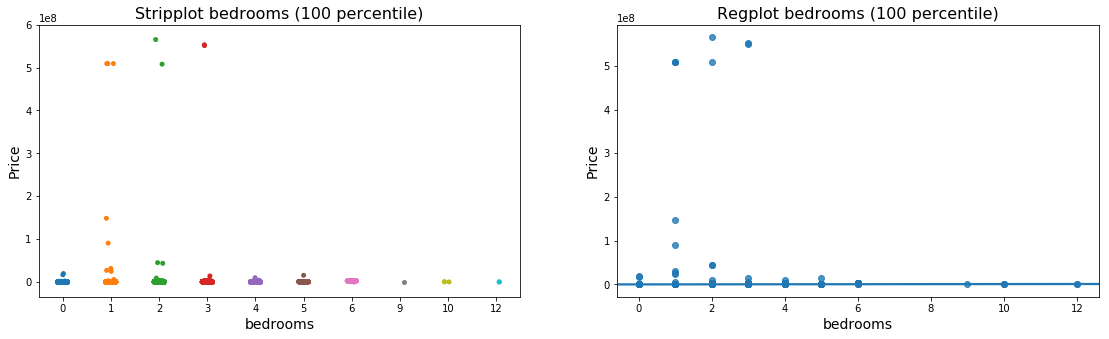

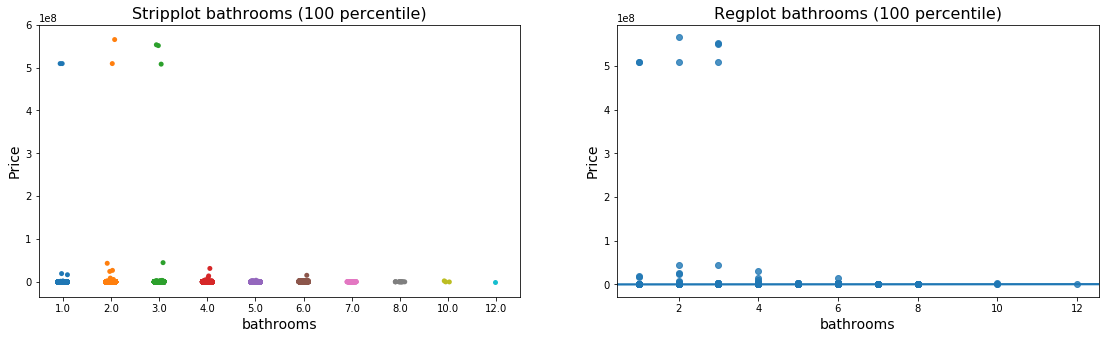

In [14]:
for feature in plot_features_2:
    plot_relation(df=df_price, x_col=feature, y_col='price', quantile_value=1)

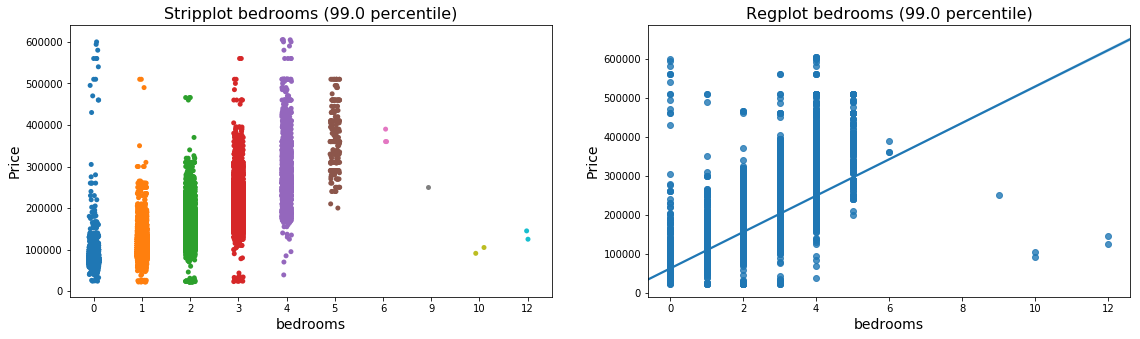

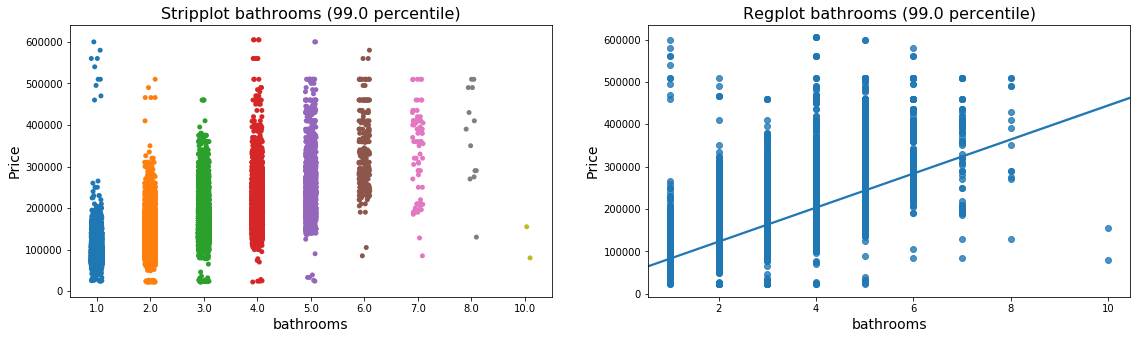

In [15]:
for feature in plot_features_2:
    plot_relation(df=df_price, x_col=feature, y_col='price', quantile_value=.99)

In [16]:
def plot_relation_reg(df, x_col, y_col, quantile_value_1, quantile_value_2):
    
    """
    Shows 2 figures with the regression plot of a feature for the percentiles specified.
    
    :param df: pandas dataframe including the feature 
    :param x_col: column name of the variable to be plotted.
    :param y_col: column name of the target variable.
    :param quantile_value_1: percentaile of the data set to be plotted.
    :param quantile_value_2: percentaile of the data set to be plotted.
    
    :return: regression plots for a feature for different percentails of the data set
    
    """
    
    fig, [axis_1, axis_2] = plt.subplots(ncols=2,nrows=1,figsize=(19,5))
    
    regplot_feature(df, x_col, y_col, quantile_value_1, axis_1)
    regplot_feature(df, x_col, y_col, quantile_value_2, axis_2)
    
    plt.show()


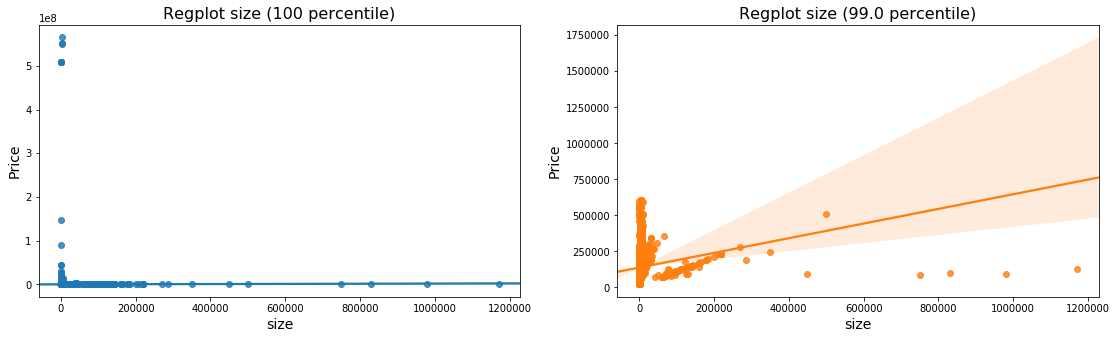

In [17]:
plot_relation_reg(df=df_price, x_col='size', y_col='price', quantile_value_1=1, quantile_value_2=.99)

#### Comments on the previous graphs (relationship between price and other features)

- #### Bedrooms and price relationship: 

From the regplot between the number of bedrooms and price for all the observations (100 percentile), it seems that the number of bedrooms is not affecting the price of a house. However, from the other regplot figure (considering just the 99 percentile of the observations with respect to the price) we can see that more number of bedrooms, more is the price of a house. So from the figure we can see that the data points seem to be in linear direction.

- #### Bathrooms:

The same comments as with the bedrooms variable can be made about the relationship between the number of bathrooms and the price.

- #### Size:

We also observe that there might be a positive relationship between the size and price of the house (99 percentile). 

### Neighbourhood feature

We have 3 unique neighbourhoods PLY, SNR and ZMS. In the next graph we observe the number of houses in each neighbourhood.

Text(0.5, 0, 'Neighbourhood')

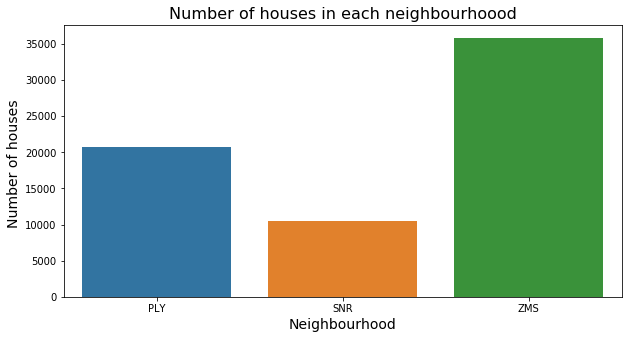

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='neighbourhood'
            ,y='price'
            ,data=df_price.groupby(['neighbourhood']).count().reset_index()
            ,ax=ax )
ax.set_title("Number of houses in each neighbourhoood", fontsize=16)
ax.set_ylabel("Number of houses ", fontsize=14)
ax.set_xlabel("Neighbourhood", fontsize=14)



### Correlation between features

In [19]:
all_features = ['price','size','bedrooms','bathrooms'] 

Text(0.5, 1.0, 'Correlation Matrix Features')

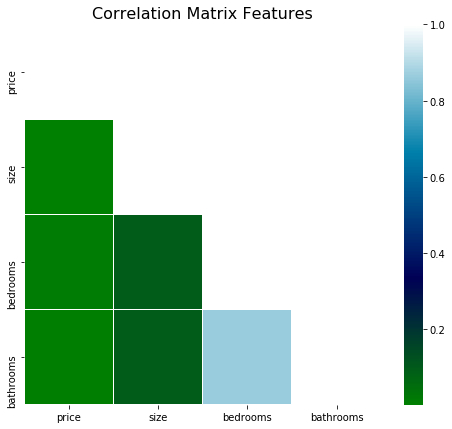

In [20]:
corrmat = df_price[all_features].corr() 
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

f, ax = plt.subplots(figsize =(8, 7)) 
sns.heatmap(corrmat, mask=mask, ax = ax, cmap ="ocean", linewidths = 0.1) 
ax.set_title("Correlation Matrix Features", fontsize=16)

In [21]:
print(df_price[['price','size','bedrooms','bathrooms'] ].corr() ) 

              price      size  bedrooms  bathrooms
price      1.000000  0.002593  0.014342   0.009842
size       0.002593  1.000000  0.099376   0.098229
bedrooms   0.014342  0.099376  1.000000   0.865070
bathrooms  0.009842  0.098229  0.865070   1.000000


In general, we can see that the majority of the features seem not to be highly correlated. However, bathrooms seems to be correlated with bedrooms. 

Since our goal is to predict the price of a house and non of the other features are correlated with the target variable, I will use all of these features in the modelling step.


### Imputation of the missing values

Replace the nan values in the bathrooms feature with the median value of the building in the neighbourhood. If there aren't any other data point in the same building I will replace it with the median value of the neighbourhood. 

Since the building feature is a category variable with many categories and many missing values, it will not be consider for the modelling step. However, this variable was used in the imputation of the missing values for the bathrooms feature. 

In [22]:
df_final = df_price.copy()
# Replace the nan values of the bathrooms column
df_final['bathrooms'].fillna(df_final.groupby(['neighbourhood', 'building'])['bathrooms'].transform('median'), inplace=True)
df_final['bathrooms'].fillna(df_final.groupby(['neighbourhood'])['bathrooms'].transform('median'), inplace=True)

### Outliers

The size feature has some negative values, which can no be possible and also has some very extreme (small and large values). There are some things that we could do: either remove the observetaions with these values or replace them. I will follow the second option and I will replace the negative values, a size lower than the 0.0024 percentile (so the minimun size of the house will be 247 feet like 23 square meters) and a size larger than the 0.99 percentile with the median values of the building in the neighbourhood. And if there aren't any other data point in the same building I will replace it with the median value of the neighbourhood. 

There are very expensive houses in the data set. Therefore, I will just consider the 99.7 percentaile of the observations and exclude the very high prices to train the model.



In [23]:
# Create the new_size feature
df_final['new_size']= np.where(df_final['size'] > df_final['size'].quantile(0.99), None, df_final['size'])
df_final['new_size'] = np.where((df_final['size'] < df_final['size'].quantile(0.0024)), None, df_final['new_size'])
df_final['new_size'] = df_final['new_size'].astype(float)

#Replace the nan values of the new_size column
df_final['new_size'].fillna(df_final.groupby(['neighbourhood'])['new_size'].transform('median'), inplace=True)

#Select just the 99.7 percentaile of the data (considering the price variable)
df_final = df_final[df_final.price < np.percentile(df_final.price,99.7)]

As we can see from all the above representation many factors are affecting the prices of the house, like size  which increases the price of the house and also the number of bathrooms and bedrooms influence the prices of the house.
Now that we are familiar with all the features, let us move and create a model to which would predict the price of the house based upon the other factors such as size, number of bathrooms etc. 

## 3. Create a predictive algorithm

### Prepare data for modelling

In this step I preprocess the raw features for the next predictive modelling step. 

 - Enconde categorical features 
 
 - Split data into target and features
   
 - Split data into training and test set
   

In [24]:
def data_prep(df, target, dummy_column, list_columns_to_drop, test_size, random_state):
    
    """
    Funtion to preprocess the data for the modelling step
    
    :param df: pandas dataframe including all the features for the model
    :param target: target variable name
    :param dummy_column: dummy column name
    :param list_columns_to_drop: list with the name of columns to drop
    :param test_size: percentage to split the test and training set
    :param random_state: random state for the splitting
    
    :return: data farmes (X_train and X_test) with the features to train and test the model and y_train and y_test with the target variable to train and test.
    
    """
    
    df_model = pd.get_dummies(df, columns=[dummy_column], drop_first=True)
    
    X = df_model.drop(list_columns_to_drop, axis=1)
    y = df_model[target]
    
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [25]:
list_columns_to_drop=['price','size','building']

In [26]:
X_train, X_test, y_train, y_test = data_prep(df_final, 'price','neighbourhood', list_columns_to_drop, 0.3, 123)

### Predictive modeling

Let’s sort out the steps to follow for building the predictive model:

   - Select the classification algorithms that we want to fit
   
   - Grid search with cross validation to select the best performing model

#### Select clasification algorithms 

I will train three different algorithm: 

   - Linear Regression 
   
   - Random Forest
   
   - Gradient Boosting Regressor
   

These three models predict in different ways. First, the linear regression uses a linear approach to modeling the relationship between the response (or dependent variable) with the explanatory variables. Random Forest Regressions is a tree model and a non parametric approach where it grows multiple independent decisions trees and it choses as output the mean prediction over all the trees. Gradient Boosting Regressor is also a non parametric approach which first fits simple models several times, each time focusing on those data points hard to fit to get them right.

#### Set grid search parameters 

Since the idea is to test more than one algorithm with more than one hyper-parameter in order to find the best possible model, I use a pipeline which allows to do this in a code-efficient manner. 

For this step, I create a dictionary with the different algorithms and the hyperparameters for tuning.

- Linear regression

- Random Forest: number of trees, maximum deph in each decision tree and maximum number of features considered for splitting a node

- GBM: number of trees, maximum depth of a tree, and learning rate.



In [27]:
# Create a pipeline
pipe = Pipeline([("reg", RandomForestRegressor())])
# Create dictionary with candidate learning algorithms and their hyperparameters
param_grid = [  {"reg": [LinearRegression()]
                },
                {"reg": [GradientBoostingRegressor()],
                 "reg__n_estimators": list((range(10,100, 10))),
                 "reg__max_depth":[5,7,10,12],
                 "reg__learning_rate" : np.arange(0.01, 0.1, 0.05)
                },
                {"reg": [RandomForestRegressor()],
                 "reg__n_estimators": list((range(10,100, 10))),
                 "reg__max_depth":[5,7,10,12],
                 "reg__max_features": ['auto', 'sqrt']}]



As mentioned above I perform a grid search in order to find the best hyperparameters for each algorithm. This is combined with a 5 fold cross validation in order to receive robust results.

In [28]:
 def model_selection(pipe, param_grid, X_train, y_train, scoring, cv):
    """
    Perform a complete grid search for each model provided in the dict. based on parameter grid
    Returns the best score metric and a dict including all the best parameters from the gridsearch.
    
    param pipe: pipeline
    param param_grid: dictionary with each model and the tunning parameters 
    param X_train: Features for training
    param y_train: Target variable
    param scoring (str): evaluation metric
    param cv: Number of k-fold cross validation
    
    returns: best score (RMSE) and a dictionary with the best paramaters
    
    """
    
    gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scoring, cv=cv) 
    gridsearch_results = gridsearch.fit(X_train, y_train)

    best_score = gridsearch_results.best_score_
    best_parameters = gridsearch_results.best_params_

    print("*************************")
    print(" Results from Grid Search " )
    print("*************************")
    print("\n The best estimator across ALL searched params:\n", best_parameters['reg'])
    print("*************************")
    # Root Mean Squared Error
    print("\n The best score (RMSE) across ALL searched params:\n", np.sqrt(-gridsearch_results.best_score_))
  
    best_params =  [keys for keys in best_parameters.keys() if keys.startswith('reg__') ]
    
    print("*************************")
    print("\n The best parameters across ALL searched params:\n")

    for param in best_params:
        print(param, best_parameters[param])
    
    return best_score, best_parameters

In [29]:
best_score, best_parameters = model_selection(pipe, param_grid, X_train, y_train, 'neg_mean_squared_error', 5)

*************************
 Results from Grid Search 
*************************

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.060000000000000005, loss='ls', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=90,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
*************************

 The best score (RMSE) across ALL searched params:
 44150.23801228293
*************************

 The best parameters across ALL searched params:

reg__learning_rate 0.060000000000000005
reg__max_depth 7
reg__n_estimators 90


Remark: Please note that this is not a full GridSearch. We could explore with more hyperparameters for each algorithm.

#### Results Model Selection

As printed above we see that the Gradient Boosting regressor performed the best measured in the estimated test-MSE. I will use the GBM model with it's best parameters resulting from the grid search as the final model in order to predict the price of the houses. 

## 4. Evaluation of Final Model against the test set

In this last step I calculate different error metrics for the test set.

In [31]:
params = {key.split('__')[1]:best_parameters[key] for key in best_parameters if key.startswith('reg__')}

In [32]:
# Fit the model with the selected algorithm and hyperparameters from the Gridsearch.
gb_model = GradientBoostingRegressor(**params).fit(X_train, y_train)

#Predict values of the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate the RMSE and MAE for the test set 
RMSE = sqrt(mean_squared_error(y_test, y_pred_gb))
MAE = mean_absolute_error(y_test, y_pred_gb)
print(f"Root Mean Squared Error: {round(RMSE,2)}")
print(f"Mean Absolute Error: {round(MAE,2)}")
print(f"Std. for test prices: {round(y_test.std(),2)*100}")
print(f"Relative Error wrt. mean price (RMSE) in %: {round(RMSE/y_test.mean(),2)*100}")
print(f"Relative Error wrt. mean price (MAE) in %: {round(MAE/y_test.mean(),2)*100}")


Root Mean Squared Error: 42814.95
Mean Absolute Error: 17409.23
Std. for test prices: 8181937.0
Relative Error wrt. mean price (RMSE) in %: 30.0
Relative Error wrt. mean price (MAE) in %: 12.0


In [33]:
y_test.std() / y_test.mean()

0.5688848542726627

## Observations

When comparing the different errors against each other and against the standard deviation we can observe a few things. First, we see that the RMSE is far bigger than the MAE this suggest that there some predictions which present a very big error and hence moving the RMSE up. To further imoprove the model we should take a look at those values to identify the reason for this abnormal high error.
Second, both the RMSE and the MAE are still within one standard devition of the mean which can be considered good. However, there is room for improvement given that the standard deviation is realtively big compared to the mean (0.56 [y_test.std() / y_test.mean()]). A tailored apporach towards low to mid level prices and one for high level prices with additional features accounting for the price differences might improve the predictions considerably.